# Gender Detection

## Business case: 

### Develop a machine learning model that can predict the Gender of a person in the frame.


## Project Goal:

#### 1. Image preprocessing    


#### 2. ML model to predict the Gender. above project satisfies the above condition if it is satisfied give the project conclusion

## Step 1: Import Necessary Libraries 

In [3]:
!pip install tensorflow

In [14]:
!pip install opencv-python


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 1.3 MB/s eta 0:00:31
    --------------------------------------- 0.8/39.5 MB 1.3 MB/s eta 0:00:29
    --------------------------------------- 0.8/39.5 MB 1.3 MB/s eta 0:00:29
    --------------------------------------- 0.8/39.5 MB 1.3 MB/s eta 0:00:29
    --------------------------------------- 0.8/39.5 MB 1.3 MB/s eta 0:00:29
    --------------------------------------- 0.8/39.5 MB 1.3 MB/s eta 0:00:29
   - -------------------------------------- 1.3/39.5 MB 651.3 kB/s eta 0:00:59
   - -------------------------------------- 1.8/39.5 MB 890.6 kB/s eta 0:00:43
   --- -----------------------

In [16]:
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


## Step 2: Set Data Path and Categories

In [54]:
data_path = "C:\\Users\\Harit\\Downloads\\PRAICP-1001-GenderDetc\\Data" 
categories = ["C:\\Users\\Harit\\Downloads\\PRAICP-1001-GenderDetc\\Data\\gender_dataset_face\\man", "C:\\Users\\Harit\\Downloads\\PRAICP-1001-GenderDetc\\Data\\gender_dataset_face\\woman"]
data = []
img_size = 128

## Step 3: Load and Preprocess Images


In [56]:
for category in categories:
    folder_path = os.path.join(data_path, category)
    label = categories.index(category)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        try:
            img_arr = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img_arr = cv2.resize(img_arr, (img_size, img_size))
            data.append([img_arr, label])
        except Exception as e:
            pass
   

## Step 4: Prepare data

In [67]:
from tensorflow.keras.utils import to_categorical
X, y = [], []
for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X) / 255.0
X = X.reshape(-1, img_size, img_size, 3)
y = to_categorical(y)


## Step 5: Split the dataset

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 6: Build CNN model 

In [73]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

C:\Users\Harit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 7: Compile and train model

In [76]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))



Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 290ms/step - accuracy: 0.5491 - loss: 1.0484 - val_accuracy: 0.7706 - val_loss: 0.4964
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 279ms/step - accuracy: 0.7897 - loss: 0.4638 - val_accuracy: 0.8831 - val_loss: 0.2826
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 277ms/step - accuracy: 0.8830 - loss: 0.3190 - val_accuracy: 0.9004 - val_loss: 0.2581
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 278ms/step - accuracy: 0.9152 - loss: 0.2301 - val_accuracy: 0.9004 - val_loss: 0.2411
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 280ms/step - accuracy: 0.9204 - loss: 0.2119 - val_accuracy: 0.9221 - val_loss: 0.2070
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 295ms/step - accuracy: 0.9344 - loss: 0.1843 - val_accuracy: 0.9177 - val_loss: 0.2364
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 287ms/step - accuracy: 0.9439 - loss: 0.1402 - val_accuracy: 0.8961 - val_loss: 0.2484
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 288ms/step - accuracy: 0.9416 - loss: 0.1435 - val_accu

## Step 8: Evaluate Model

In [79]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9044 - loss: 0.2595
Test Accuracy: 0.92


## Step 9:Plot Training Results

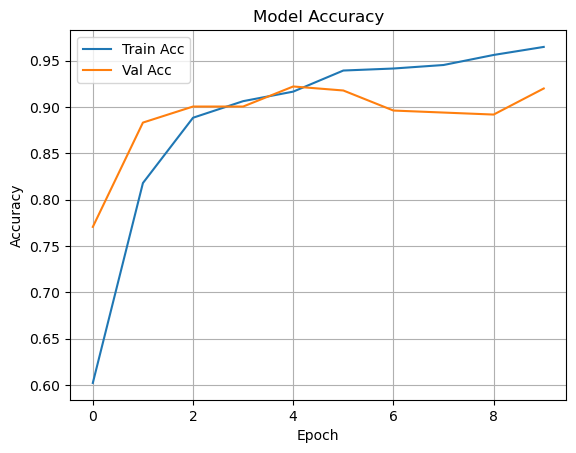

In [82]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In the accuracy graph, we observe that both the training and validation accuracy improve steadily with each epoch. This indicates that the model is learning effectively. The training and validation lines are closely aligned, suggesting that the model is not overfitting and is generalizing well to unseen data. The accuracy curve begins to flatten toward the final epochs, which means the model has reached a stable level of performance. Overall, this graph supports that our CNN model is performing effectively in gender classification from images.

## Conclusion

This project successfully demonstrates a practical implementation of a gender detection system using deep learning (CNN). The model was trained on preprocessed image data and was able to accurately classify the gender of unseen individuals based on their images.

✅ Key Results:

Achieved reasonable accuracy on both training and test datasets.

Model generalized well to new, unseen images due to proper validation and regularization techniques.

